<a href="https://colab.research.google.com/github/ACE2043919/IA_RN/blob/main/RED_PIA_EQUIPO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# PIA: Red Neuronal**

*  Ariel Alejandro Celestino Diaz de Leon - 2043919
*  Rogelio Rodriguez Garcia - 2072414
*  Fermin Andres Castillo Almanza - 2048790
*  Alonso Alejandro Sanchez Cedillo - 2078344
*  Diego Alejandro Muñiz Acuña - 2082358

In [1]:
!mkdir botellas
!mkdir latas
!mkdir vasos

In [2]:
%cd botellas
!unzip /content/botellas.zip
%cd ..

%cd latas
!unzip /content/latas.zip
%cd ..

%cd vasos
!unzip /content/Vasos.zip
%cd ..


/content/botellas
Archive:  /content/botellas.zip
  inflating: desce (126).jpeg        
  inflating: desce (127).jpeg        
  inflating: desce (128).jpeg        
  inflating: desce (129).jpeg        
  inflating: desce (130).jpeg        
  inflating: desce (131).jpeg        
  inflating: desce (132).jpeg        
  inflating: desce (134).jpeg        
  inflating: desce (135).jpeg        
  inflating: desce (136).jpeg        
  inflating: botellas (1).png        
  inflating: botellas (2).jpeg       
  inflating: botellas (2).png        
  inflating: botellas (3).jpeg       
  inflating: botellas (7).jpeg       
  inflating: botellas (8).jpeg       
  inflating: botellas (9).jpeg       
  inflating: botellas (10).jpeg      
  inflating: botellas (12).jpeg      
  inflating: botellas (14).jpeg      
  inflating: botellas (16).jpeg      
  inflating: botellas (19).jpeg      
  inflating: botellas (21).jpeg      
  inflating: botellas (26).jpeg      
  inflating: botellas (27).jpeg      


In [3]:
!rm -rf /content/botellas.zip
!rm -rf /content/latas.zip
!rm -rf /content/Vasos.zip

In [4]:
!ls /content/botellas | wc -l
!ls /content/latas | wc -l
!ls /content/vasos | wc -l

331
282
232


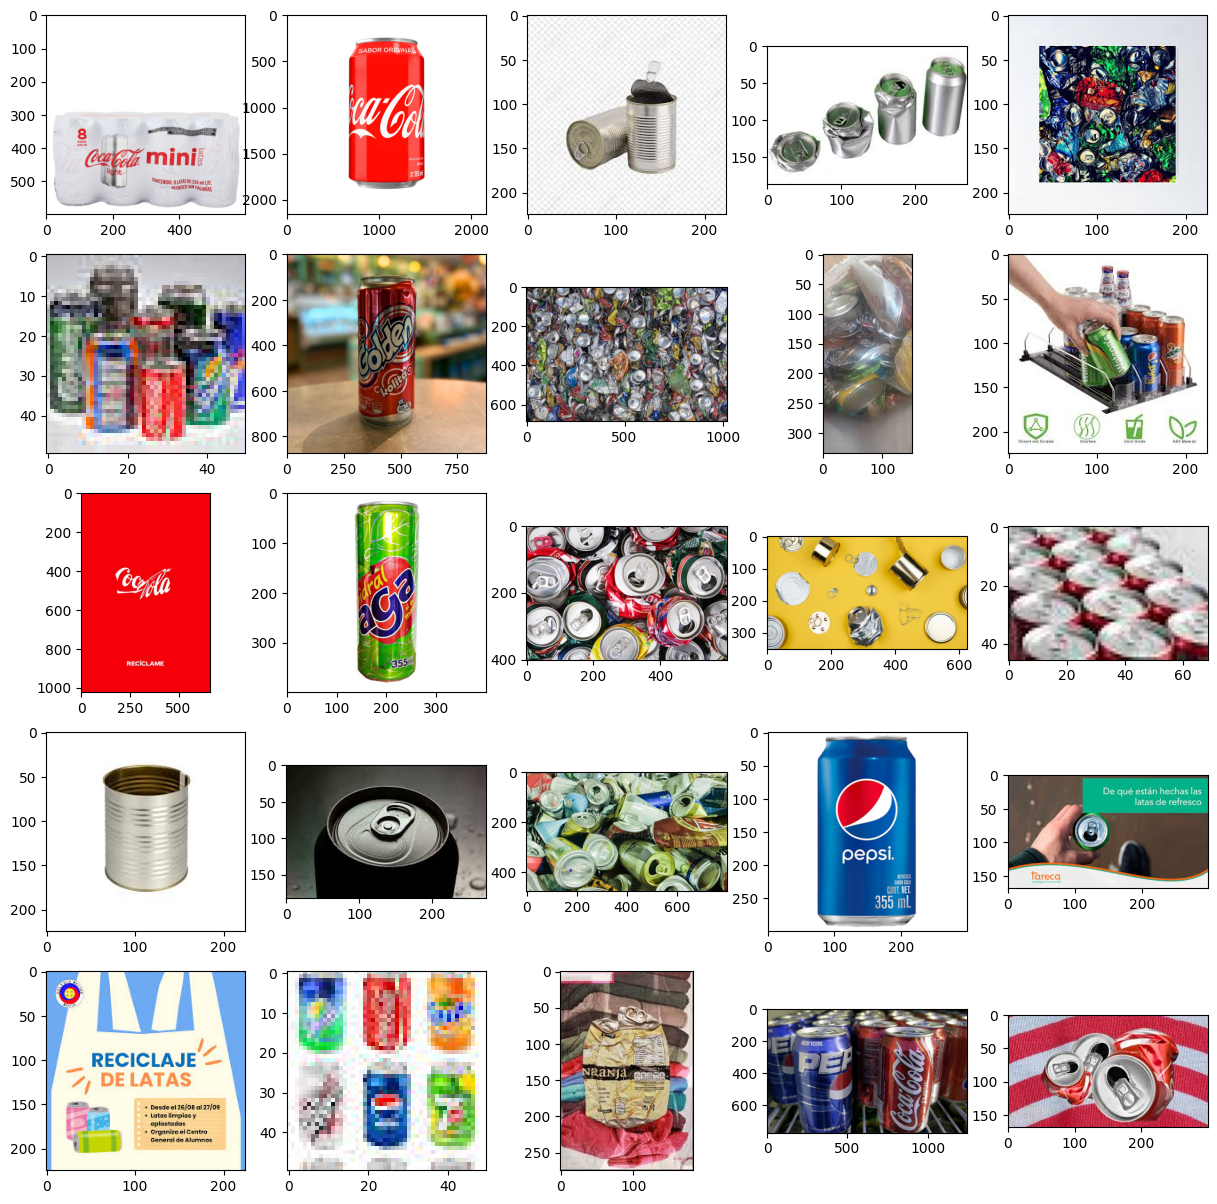

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/latas'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  img = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(img)

plt.show()

In [6]:
!mkdir dataset
!mkdir dataset/botellas
!mkdir dataset/latas
!mkdir dataset/vasos

In [7]:
import shutil
carpeta_fuente = '/content/botellas'
carpeta_destino = '/content/dataset/botellas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 232:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [8]:
import shutil
carpeta_fuente = '/content/latas'
carpeta_destino = '/content/dataset/latas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 232:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [9]:
import shutil
carpeta_fuente = '/content/vasos'
carpeta_destino = '/content/dataset/vasos'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 232:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [10]:
!ls /content/dataset/botellas | wc -l
!ls /content/dataset/latas | wc -l
!ls /content/dataset/vasos | wc -l

232
232
232


Found 558 images belonging to 3 classes.
Found 138 images belonging to 3 classes.


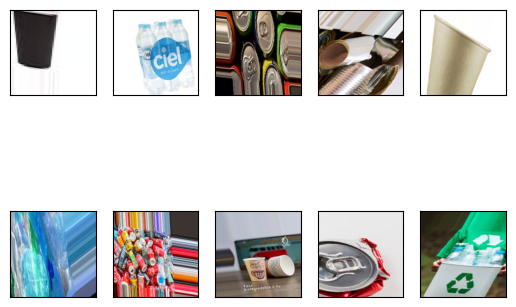

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size = (224, 224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size = (224, 224),
                                                     batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [13]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [14]:
mobilenetv2.trainable = False

In [15]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

mobilenetv2.trainable = False


model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224,224,3)),
    tf.keras.layers.Lambda(lambda x: mobilenetv2(x)),
    tf.keras.layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,843 (15.01 KB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
EPOCAS = 50

historial = model.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
16/18 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step - accuracy: 0.4391 - loss: 1.0670

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 941ms/step - accuracy: 0.4611 - loss: 1.0393 - val_accuracy: 0.6304 - val_loss: 0.8280
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 488ms/step - accuracy: 0.7767 - loss: 0.5661 - val_accuracy: 0.7246 - val_loss: 0.6529
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 475ms/step - accuracy: 0.8554 - loss: 0.4116 - val_accuracy: 0.7391 - val_loss: 0.6365
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - accuracy: 0.8595 - loss: 0.3719 - val_accuracy: 0.8333 - val_loss: 0.4562
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 487ms/step - accuracy: 0.8685 - loss: 0.3330 - val_accuracy: 0.7971 - val_loss: 0.4789
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 483ms/step - accuracy: 0.8927 - loss: 0.3111 - val_accuracy: 0.7754 - val_loss: 0.4595
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 478ms/step - accuracy: 0.9107 - loss: 0.2558 - val_accuracy: 0.7826 - val_loss: 0.4815
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 484ms/step - accuracy: 0.9005 - loss: 0.2858 - val_accuracy: 0.7899 - val

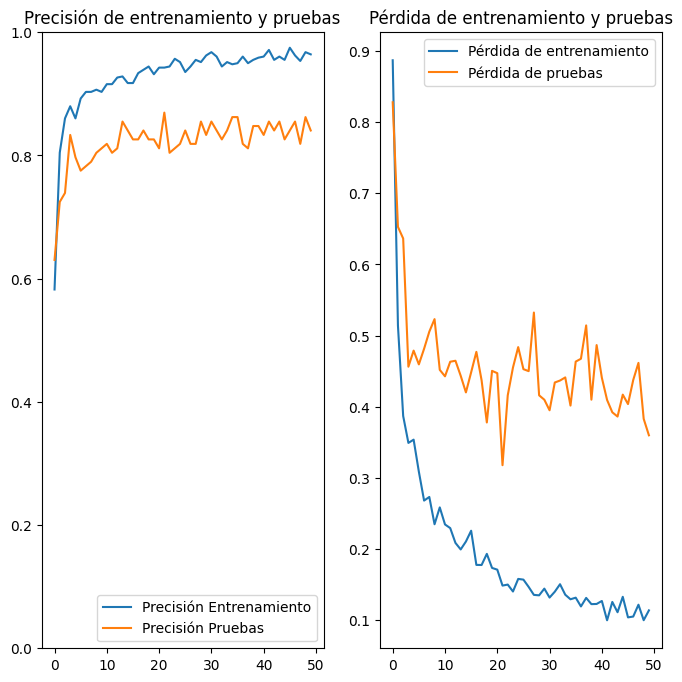

In [20]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.ylim([0,1])
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [21]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = model.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [22]:
url = 'https://www.omipack.com/wp-content/uploads/2022/06/vaso-carton-kraft-120ml-4oz.jpg'
prediccion = categorizar(url)
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
2


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
model.save('/content/PIA_modelo.keras')